<a href="https://colab.research.google.com/github/HYUNSOOLEE-6839/TIL/blob/main/Day-21/MNN_in_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [9]:
EPOCHS = 20

### 네트워크 구조 정의

In [3]:
def MyModel():
    feat = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False) 

    feat.trainable = False # 네트워크 부분을 학습하지 않게 되어 Freeze 됨.
    
    seq = tf.keras.models.Sequential()
    seq.add(feat) # h x w x channel
    seq.add(tf.keras.layers.GlobalAveragePooling2D()) 
    # Sequential한 부분 모두 pooling 해주고, channel만 남김.

    seq.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # include_top이 False라면, Fully-connected layer 제외하고 Convolutional layer만 포함.
    return seq

### Load Data

In [4]:
dataset, meta = tfds.load('cats_vs_dogs',
split=('train[:80%]', 'train[80%:]'), with_info=True, as_supervised=True)
# 최근 tfds.subsplit이 deprecated 되어 사용 불가. 다른 방법 통해 셋을 나누어야함.
train_ds, test_ds = dataset

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteG0PTHC/cats_vs_dogs-train.tfrecord


Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


### 데이터 확인하기

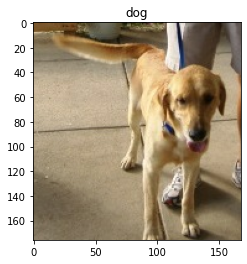

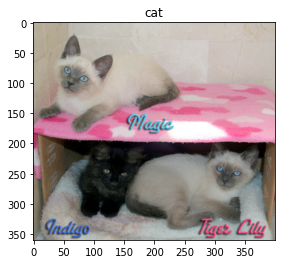

In [5]:
l2s = meta.features['label'].int2str
for img, label in test_ds.take(2):
    plt.figure()
    plt.imshow(img)
    plt.title(l2s(label))
    plt.show()

### 데이터 가공

In [6]:
def preprocess(img, label):
    img = tf.cast(img, tf.float32) / 255.0
    img = tf.image.resize(img, (224, 224))
    return img, label

train_ds = train_ds.map(preprocess).batch(8).prefetch(1024)
test_ds = test_ds.map(preprocess).batch(8).prefetch(1024)

### 모델 생성

In [7]:
model = MyModel()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

9412608/9406464 [==============================] - 0s 0us/step


### 모델 학습

In [10]:
model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

Epoch 1/20
2327/2327 [==============================] - 56s 24ms/step - loss: 0.0127 - accuracy: 0.9973 - val_loss: 0.0648 - val_accuracy: 0.9824
Epoch 2/20
2327/2327 [==============================] - 56s 24ms/step - loss: 0.0121 - accuracy: 0.9976 - val_loss: 0.0657 - val_accuracy: 0.9822
Epoch 3/20
2327/2327 [==============================] - 56s 24ms/step - loss: 0.0115 - accuracy: 0.9979 - val_loss: 0.0672 - val_accuracy: 0.9815
Epoch 4/20
2327/2327 [==============================] - 56s 24ms/step - loss: 0.0110 - accuracy: 0.9981 - val_loss: 0.0686 - val_accuracy: 0.9813
Epoch 5/20
2327/2327 [==============================] - 56s 24ms/step - loss: 0.0104 - accuracy: 0.9984 - val_loss: 0.0701 - val_accuracy: 0.9811
Epoch 6/20
2327/2327 [==============================] - 56s 24ms/step - loss: 0.0099 - accuracy: 0.9984 - val_loss: 0.0715 - val_accuracy: 0.9807
Epoch 7/20
2327/2327 [==============================] - 56s 24ms/step - loss: 0.0093 - accuracy: 0.9985 - val_loss: 0.0729 -